# Sentiment Analysis of Tweets
The tweets.csv file contains the following columns:
- target: the polarity of the tweet (0 = negative, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

In [ ]:
%%bash

# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark

# Download tweets.csv from github
# If the tweets.csv file does not exist in the colab environment
if [[ ! -f ./tweets.csv ]]; then 
   # download tweets.csv file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/tweets.csv   
fi

# vefify tweets.csv exits in the colab env - should not print an error message
ls tweets.csv

  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=fe6945bc680ada2da3c985452508c7414f61e77418046267f24438cde551e785
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark
tweets.csv


--2020-10-22 20:13:16--  https://raw.githubusercontent.com/wewilli1/ist718_data/master/tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13727793 (13M) [text/plain]
Saving to: ‘tweets.csv’

     0K .......... .......... .......... .......... ..........  0% 1.86M 7s
    50K .......... .......... .......... .......... ..........  0% 4.12M 5s
   100K .......... .......... .......... .......... ..........  1% 10.8M 4s
   150K .......... .......... .......... .......... ..........  1% 6.18M 3s
   200K .......... .......... .......... .......... ..........  1% 23.5M 3s
   250K .......... .......... .......... .......... ..........  2% 18.4M 2s
   300K .......... .......... .......... .......... ..........  2% 25.1M 2s
   350K .......... .......... .......... .

In [ ]:
# import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [ ]:
# Do not delete or change this cell

enable_grid = True

# grading import statements
%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

# Import dataset
Read tweets.csv into a spark dataframe named `tweets_df`. Drop all columns except target and text.  Transform the target column: 
- A negative sentiment is equal to 0. 
- A positive sentiment is equal to 1. 

In [ ]:
# import the dataframe and only select the target columns we want

[Row(target='4', text='I LOVE @Health4UandPets u guys r the best!! '),
 Row(target='4', text='im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!'),
 Row(target='4', text='@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. '),
 Row(target='4', text='Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup'),
 Row(target='4', text='@LovesBrooklyn2 he has that effect on everyone ')]

In [ ]:
tweets_df.select("target").distinct().show()

+------+
|target|
+------+
|     0|
|     4|
+------+



In [ ]:
# change the 'target' column: negative --> 0, positive --> 1
from pyspark.sql.functions import regexp_replace
tweets_df = tweets_df.withColumn('target', regexp_replace('target', '4', '1'))
tweets_df.show()

+------+--------------------+
|target|                text|
+------+--------------------+
|     1|I LOVE @Health4Ua...|
|     1|im meeting up wit...|
|     1|@DaRealSunisaKim ...|
|     1|Being sick can be...|
|     1|@LovesBrooklyn2 h...|
|     1|@ProductOfFear Yo...|
|     1|@r_keith_hill Tha...|
|     1|@KeepinUpWKris I ...|
|     1|@tommcfly ah, con...|
|     1|@e4VoIP I RESPOND...|
|     1|crazy day of scho...|
|     1|@naughtyhaughty H...|
|     1|@nileyjileyluver ...|
|     1|@soundwav2010 At ...|
|     1|@LutheranLucciol ...|
|     1|Just added tweeti...|
|     1|@michellardi i re...|
|     1|@nicolerichie: yo...|
|     1|Catching Up on Em...|
|     1|Dancing around th...|
+------+--------------------+
only showing top 20 rows



In [ ]:
target_count = tweets_df.groupBy('target').count()
target_count.show()

+------+-----+
|target|count|
+------+-----+
|     0|50000|
|     1|50000|
+------+-----+



In [ ]:
print('The percentage of negative tweets:',target_count.collect()[0][1]/tweets_df.count())
print('The percentage of positive tweets:',target_count.collect()[1][1]/tweets_df.count())

The percentage of negative tweets: 0.5
The percentage of positive tweets: 0.5


# Data Pre-processing
Create a pipeline named `tweets_pre_proc_pipe` which contains tokenize, remove stop words, and do a TF-IDF transformation.

In [ ]:
from pyspark.ml.feature import RegexTokenizer
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import IDF
import requests
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer


# the tokenizer object
# Regular expressions are a powerful tool to extract strings with certain characteristics. 
# The pattern \p{L}+ means that it will extract letters without accents (e.g., it will extract "Acuna" from "Acuña"). 
# setGaps=False means that it will keep applying the rule until it can't extract new words.
tokenizer = RegexTokenizer().setGaps(False)\
  .setPattern("\\p{L}+")\
  .setInputCol("text")\
  .setOutputCol("words")
#tokenizer = Tokenizer().setInputCol('text').setOutputCol('words')

# stopwords object
# we obtain the stop words from a website
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()
stop_words[0:10]
sw_filter = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")

# we will remove words that appear in 5 docs or less
cv = CountVectorizer()\
  .setInputCol("filtered")\
  .setOutputCol("tf")

# TF-IDF object
idf = IDF().\
    setInputCol('tf').\
    setOutputCol('tfidf')



In [ ]:
# build the pipeline
pipe1 = Pipeline(stages=[tokenizer, sw_filter, cv]).fit(tweets_df)
tweets_pre_proc_pipe = Pipeline(stages=[pipe1, idf]).fit(tweets_df)

In [ ]:
tweets_pre_proc_df = tweets_pre_proc_pipe.transform(tweets_df)

In [ ]:
TFIDF = tweets_pre_proc_df.select('tfidf')
print('The shape of TF-IDF data:\nNumber of rows:',TFIDF.count(),'\nNumber of words:',TFIDF.collect()[0][0].size)

The shape of TF-IDF data:
Number of rows: 100000 
Number of words: 82504


In [ ]:
display(tweets_pre_proc_df.toPandas().head())

,target,text,words,filtered,tf,tfidf
0,1,I LOVE @Health4UandPets u guys r the best!!,"[i, love, health, uandpets, u, guys, r, the, b...","[love, health, uandpets, u, guys, r, best]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,im meeting up with one of my besties tonight! ...,"[im, meeting, up, with, one, of, my, besties, ...","[im, meeting, besties, tonight, wait, girl, talk]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S...","[darealsunisakim, thanks, for, the, twitter, a...","[darealsunisakim, thanks, twitter, add, sunisa...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,Being sick can be really cheap when it hurts t...,"[being, sick, can, be, really, cheap, when, it...","[sick, really, cheap, hurts, eat, real, food, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, he, has, that, effect, on, eve...","[lovesbrooklyn, effect]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Based on the shape we get above, there are 82504 words. This is a huge dataset, which means too complex. So if we perform logistic regression on it, there is a high posibility that it may cause overfitting.

# Calculate the IDF score of each word
Since IDF considers a word's frequency across all documents in a corpus, I will use IDF as a form of inference. Then create another pandas dataframe containing the 5 least important IDF scores named `least_imp_idf`.

In [ ]:
q3df = tweets_pre_proc_df.select('filtered')

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id
q3df = q3df.withColumn('id',monotonically_increasing_id())

In [ ]:
from pyspark.sql.functions import explode
q3df1 = q3df.select('filtered','id',explode(q3df.filtered).alias("word"))
q3df1.show()

+--------------------+---+---------------+
|            filtered| id|           word|
+--------------------+---+---------------+
|[love, health, ua...|  0|           love|
|[love, health, ua...|  0|         health|
|[love, health, ua...|  0|       uandpets|
|[love, health, ua...|  0|              u|
|[love, health, ua...|  0|           guys|
|[love, health, ua...|  0|              r|
|[love, health, ua...|  0|           best|
|[im, meeting, bes...|  1|             im|
|[im, meeting, bes...|  1|        meeting|
|[im, meeting, bes...|  1|        besties|
|[im, meeting, bes...|  1|        tonight|
|[im, meeting, bes...|  1|           wait|
|[im, meeting, bes...|  1|           girl|
|[im, meeting, bes...|  1|           talk|
|[darealsunisakim,...|  2|darealsunisakim|
|[darealsunisakim,...|  2|         thanks|
|[darealsunisakim,...|  2|        twitter|
|[darealsunisakim,...|  2|            add|
|[darealsunisakim,...|  2|         sunisa|
|[darealsunisakim,...|  2|            got|
+----------

In [ ]:
from pyspark.sql.functions import count
q3df1 = q3df1.groupBy('id','word').agg(count('filtered').alias('tf'))
q3df1.show()

+---+-------------+---+
| id|         word| tf|
+---+-------------+---+
| 71|      leiabox|  1|
| 86|     finished|  1|
| 88|          san|  2|
|127|       mirror|  1|
|174|        agree|  1|
|215|         bike|  1|
|222|        right|  1|
|224|         club|  1|
|244|         like|  1|
|261|            s|  1|
|308|         iowa|  1|
|308|         come|  1|
|317|espressowoman|  1|
|333|        great|  1|
|359|  neverwinter|  1|
|424|         hoow|  1|
|442|      exactly|  1|
|458|        watch|  1|
|469|        point|  1|
|505|         drum|  1|
+---+-------------+---+
only showing top 20 rows



In [ ]:
q3df1 = q3df1.groupBy('word').agg(count('id').alias('df'))
q3df1.show()

+-----------+----+
|       word|  df|
+-----------+----+
|       hope|2102|
|   everyday|  72|
|       lfta|  10|
|        art| 119|
|      monte|   6|
|      chibi|   2|
| booooooooo|   2|
|     travel|  76|
|    persist|   5|
|     poetry|  10|
|       cubs|  16|
|     online| 297|
|   incoming|   9|
|       sheï|   3|
|       earl|   8|
|  connected|  25|
|interaction|   7|
|     snores|   4|
|      trail|  13|
|      input|  14|
+-----------+----+
only showing top 20 rows



- <b>Inverse Document Frequency(IDF)</b>

  Formula: idf(t) = log(N/(df + 1))

In [ ]:
from pyspark.sql.functions import log10
from pyspark.sql.functions import col
q3df1 = q3df1.withColumn("df", q3df1['df'].cast('int')) 
q3df1 = q3df1.withColumn('newdf',col('df')+1)
q3df1 = q3df1.withColumn('logdf',log10(col('newdf')))

In [ ]:
q3df1.show()

+-----------+----+-----+-------------------+
|       word|  df|newdf|              logdf|
+-----------+----+-----+-------------------+
|       hope|2102| 2103|  3.322839272686321|
|   everyday|  72|   73|  1.863322860120456|
|       lfta|  10|   11|  1.041392685158225|
|        art| 119|  120| 2.0791812460476247|
|      monte|   6|    7| 0.8450980400142568|
|      chibi|   2|    3|0.47712125471966244|
| booooooooo|   2|    3|0.47712125471966244|
|     travel|  76|   77| 1.8864907251724818|
|    persist|   5|    6| 0.7781512503836436|
|     poetry|  10|   11|  1.041392685158225|
|       cubs|  16|   17| 1.2304489213782739|
|     online| 297|  298| 2.4742162640762553|
|   incoming|   9|   10|                1.0|
|       sheï|   3|    4| 0.6020599913279624|
|       earl|   8|    9| 0.9542425094393249|
|  connected|  25|   26|  1.414973347970818|
|interaction|   7|    8| 0.9030899869919435|
|     snores|   4|    5| 0.6989700043360189|
|      trail|  13|   14|  1.146128035678238|
|      inp

In [ ]:
import math
N = math.log10(100000)
N

5.0

In [ ]:
q3df2 = q3df1.withColumn('idf',N-col('logdf'))
q3df2.show()

+-----------+----+-----+-------------------+------------------+
|       word|  df|newdf|              logdf|               idf|
+-----------+----+-----+-------------------+------------------+
|       hope|2102| 2103|  3.322839272686321|1.6771607273136788|
|   everyday|  72|   73|  1.863322860120456| 3.136677139879544|
|       lfta|  10|   11|  1.041392685158225| 3.958607314841775|
|        art| 119|  120| 2.0791812460476247|2.9208187539523753|
|      monte|   6|    7| 0.8450980400142568| 4.154901959985743|
|      chibi|   2|    3|0.47712125471966244| 4.522878745280337|
| booooooooo|   2|    3|0.47712125471966244| 4.522878745280337|
|     travel|  76|   77| 1.8864907251724818| 3.113509274827518|
|    persist|   5|    6| 0.7781512503836436| 4.221848749616356|
|     poetry|  10|   11|  1.041392685158225| 3.958607314841775|
|       cubs|  16|   17| 1.2304489213782739| 3.769551078621726|
|     online| 297|  298| 2.4742162640762553|2.5257837359237447|
|   incoming|   9|   10|                

In [ ]:
q3df2.select("word").distinct().count()

82504

In [ ]:
q3df2 = q3df2.sort('idf')
least_imp_idf = q3df2.limit(5).select('word','idf')
least_imp_idf.show() 

+----+------------------+
|word|               idf|
+----+------------------+
|   t|0.9695217193775916|
|   s|0.9761716074651137|
|   m|1.1071821756904239|
|just|1.1156578523529412|
|good|1.2478746927021018|
+----+------------------+



In [ ]:
q3df2 = q3df2.sort('idf', ascending=False)
most_imp_idf = q3df2.limit(5).select('word','idf')
most_imp_idf.show(5)

+-------------+-----------------+
|         word|              idf|
+-------------+-----------------+
|         jroq|4.698970004336019|
|        svago|4.698970004336019|
| amandaadkins|4.698970004336019|
|      attemtp|4.698970004336019|
|cutebutpsycho|4.698970004336019|
+-------------+-----------------+



In [ ]:
most_imp_idf = most_imp_idf.toPandas()
least_imp_idf = least_imp_idf.toPandas()

In [ ]:
display(most_imp_idf)
display(least_imp_idf)

,word,idf
0,magestiklegend,4.69897
1,shonali,4.69897
2,shak,4.69897
3,seejoshflounder,4.69897
4,calebcanal,4.69897


,word,idf
0,t,0.969522
1,s,0.976172
2,m,1.107182
3,just,1.115658
4,good,1.247875


IDF is inverse document frequency, which is using the number of times a word appears in a document, divided by the total number of words in that document. It estimates the rarity of a term in the whole document collection. When we calculate IDF, it will be very low for the most occurring words such as stop words (because stop words such as “is” is present in almost all of the documents, and N/df will give a very low value to that word). This finally gives what we want, a relative weightage.

# Logistic Regression
Create a new recursive pipeline named `lr_pipe` which starts with `tweets_pre_proc_pipe` and adds a logistic regression model using default hyper parameters.  Score the model using ROC AUC.

In [ ]:
tweets_df = tweets_df.withColumn("target", tweets_df['target'].cast('int')) 
tweets_df_q4 = tweets_df
training_df, testing_df = tweets_df.randomSplit([0.7,0.3], seed=0)
[training_df.count(), testing_df.count()]

[70048, 29952]

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Logistic regression will take the tfidf features and predict whether the review is positive (score == 1) or negative (score == 0).
lr = LogisticRegression().\
    setLabelCol('target').\
    setFeaturesCol('tfidf')
# create a pipeline transformation by chaining the tweets_pre_proc_pipe with the logistic regression step (lr)
lr_pipe = Pipeline(stages=[tweets_pre_proc_pipe, lr])

In [ ]:
lr_model =  lr_pipe.fit(training_df)

In [ ]:
lr_model.stages

[PipelineModel_e4f40f612069,
 LogisticRegressionModel: uid=LogisticRegression_54b701068a62, numClasses=2, numFeatures=82504]

In [ ]:
lr_tweets = lr_model.transform(testing_df)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='target')
lr_tweets.select("target","prediction").show(20)
print("The area under ROC (AUC) for lr_tweets set is {}".format(evaluator.evaluate(lr_tweets)))

+------+----------+
|target|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       1.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       1.0|
|     0|       1.0|
|     0|       0.0|
|     0|       0.0|
|     0|       1.0|
|     0|       1.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows

The area under ROC (AUC) for lr_tweets set is 0.6708633016940804


# Coefficient of words - Feature Importance
Create 2 pandas dataframes named `lr_pipe_df_neg` and `lr_pipe_df_pos`which contain 2 colunms: `word` and `score`.  Load the 2 dataframes with the top 10 words and logistic regression coefficients that contribute the most to negative and positive sentiments respectively.

In [ ]:
import pandas as pd
vocabulary = tweets_pre_proc_pipe.stages[0].stages[-1].vocabulary
weights = lr_model.stages[-1].coefficients
print("num weights:", len(weights))

coeffs_df_pd = pd.DataFrame({'word': vocabulary, 'weight': weights})
coeffs_df_pd.head()

num weights: 82504


,word,weight
0,s,-0.084303
1,t,-0.823007
2,m,0.026376
3,just,0.180072
4,good,0.628793


In [ ]:
# from pyspark.sql.types import ArrayType, StructField, StructType, StringType, IntegerType, FloatType
# # Create a schema for the dataframe
# mySchema = StructType([StructField("word", StringType())\
#                       ,StructField("weight", FloatType())])
# # Create data frame
# coeffs_df = spark.createDataFrame(coeffs_df_pd,schema=mySchema)
# coeffs_df.show()

In [ ]:
# from pyspark.sql import SQLContext
# sentiments_df = sqlContext.read.parquet('sentiments.parquet')

In [ ]:
# word_sentiment_df = coeffs_df.join(sentiments_df,on='word',how='left')

In [ ]:
# sentiments_df.groupBy('word').agg(count('sentiment').alias('count')).where(col("count") > 1).show()

In [ ]:
coeffs_df_pd = coeffs_df_pd.sort_values('weight')
lr_pipe_df_neg = coeffs_df_pd.head(10)

In [ ]:
coeffs_df_pd = coeffs_df_pd.sort_values('weight', ascending=False)
lr_pipe_df_pos = coeffs_df_pd.head(10)

In [ ]:
display(lr_pipe_df_neg)
display(lr_pipe_df_pos)

,word,weight
69602,xsd,-8.703413
42555,nyde,-7.957602
8565,dnw,-7.669792
82029,exeterjay,-7.608198
39371,cached,-7.125026
31920,simba,-6.958755
12623,prof,-6.926011
15305,howling,-6.893142
20657,yubotu,-6.734633
23949,ashleyemma,-6.699530


,word,weight
18233,meganmccarthy,7.296628
57091,rosenborg,6.902782
7789,instantly,6.483078
18870,tuckered,6.329126
45012,munchin,6.298903
40436,grndpas,6.100316
64855,infinitely,5.995272
70565,wedges,5.938734
24310,hornets,5.906482
39377,jpeg,5.801319


From the result we get above, it seems that not all the words can represent negative/positive. For example, xsd, nyde, yubotu are considered as the most negative words, while these words are not real words. And for words like rosenborg (maybe a name) are considered as a positive word. But actually, these words don't have any meanings.

# Model Tuning
Use a regularization grid search on a new pipeline named `lr_pipe_1`. 

In [ ]:
training_df, validation_df, testing_df = tweets_df.randomSplit([0.6, 0.3, 0.1], seed=0)
[training_df.count(), validation_df.count(), testing_df.count()]

[60093, 29907, 10000]

In [ ]:
from pyspark.sql import functions as fn
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

lr_pipe_1 = lr_pipe
if enable_grid:
  grid = ParamGridBuilder().\
    addGrid(lr.regParam, [0., 0.01, 0.02, 0.1]).\
    addGrid(lr.elasticNetParam, [0., 0.2, 0.4, 0.5]).\
    build()
  all_models = []
  for j in range(len(grid)):
    print("Fitting model {}".format(j+1))
    model = lr_pipe_1.fit(training_df, grid[j])
    all_models.append(model)
  # estimate the accuracy of each of them:
  ROC = []
  for i in all_models:
    ROC.append(evaluator.evaluate(i.transform(validation_df)))
  
  # ROC = [evaluator.evaluate()]
  # accuracies = [m.\
  #               transform(validation_df).\
  #               select(fn.avg(fn.expr('float(target = prediction)')).alias('accuracy')).\
  #               first().\
  #               accuracy for m in all_models]
  pass

Fitting model 1
Fitting model 2
Fitting model 3
Fitting model 4
Fitting model 5
Fitting model 6
Fitting model 7
Fitting model 8
Fitting model 9
Fitting model 10
Fitting model 11
Fitting model 12
Fitting model 13
Fitting model 14
Fitting model 15
Fitting model 16


# Best Model
Hard code the best model from the model tuning above. Then create 2 variables named alpha and lambda and assign to them the best alpha and lambda produced by the grid search by hard coding the values. Compare AUC scores between lr_pipe_2 with lr_pipe.

In [ ]:
ROC

[0.6573790697317056,
 0.6573790697317056,
 0.6573790697317056,
 0.6573790697317056,
 0.7062292333337561,
 0.7501741149103938,
 0.7426039009289043,
 0.7351925895835468,
 0.7134828853216074,
 0.7428449583432789,
 0.7112774208455036,
 0.7019531665707315,
 0.7197228135348784,
 0.654451038999003,
 0.5687293391018837,
 0.5623394974252773]

In [ ]:
maxroc = max(ROC)
maxroc_index = ROC.index(maxroc)
print('Max accuracy:', maxroc)
print('the index:', maxroc_index)

Max accuracy: 0.7501741149103938
the index: 5


In [ ]:
param_dict = all_models[maxroc_index].stages[-1].extractParamMap()

sane_dict = {}
for k, v in param_dict.items():
  sane_dict[k.name] = v

lambda_par = sane_dict["regParam"]
alpha_par = sane_dict["elasticNetParam"]

In [ ]:
print('lambda:',lambda_par,'\nalpha:',alpha_par)

lambda: 0.01 
alpha: 0.2


In [ ]:
lr_pipe_2 = all_models[maxroc_index]
lr2_tweets = lr_pipe_2.transform(testing_df)
evaluator=BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='target')
lr2_tweets.select("target","prediction").show(10)
print("The area under ROC (AUC) for lr_tweets set is {}".format(evaluator.evaluate(lr2_tweets)))

+------+----------+
|target|prediction|
+------+----------+
|     0|       1.0|
|     0|       0.0|
|     0|       0.0|
|     0|       1.0|
|     0|       0.0|
|     0|       1.0|
|     0|       0.0|
|     0|       1.0|
|     0|       0.0|
|     0|       1.0|
+------+----------+
only showing top 10 rows

The area under ROC (AUC) for lr_tweets set is 0.7549512190711821


In [ ]:
comapre = {'model_name':['lr_pipe', 'lr_pipe_2'],
           'auc_score':[evaluator.evaluate(lr_tweets), evaluator.evaluate(lr2_tweets)]}
comapre_1_df = pd.DataFrame(comapre, columns=['model_name', 'auc_score'])
comapre_1_df

,model_name,auc_score
0,lr_pipe,0.670863
1,lr_pipe_2,0.754951


# New Feature Importance
Perform the same inference analysis as above.

In [ ]:
vocabulary = lr_pipe_2.stages[0].stages[0].stages[-1].vocabulary
weights = lr_pipe_2.stages[-1].coefficients
print("num weights:", len(weights))

coeffs_df_pd8 = pd.DataFrame({'word': vocabulary, 'weight': weights})
coeffs_df_pd8.head()

num weights: 82504


,word,weight
0,s,0.000000
1,t,-0.331468
2,m,-0.006320
3,just,0.032196
4,good,0.278944


In [ ]:
coeffs_df_pd8 = coeffs_df_pd8.sort_values('weight')
lr_pipe_df_neg_1 = coeffs_df_pd8.head(10)

In [ ]:
coeffs_df_pd8 = coeffs_df_pd8.sort_values('weight', ascending=False)
lr_pipe_df_pos_1 = coeffs_df_pd8.head(10)

In [ ]:
# grading cell - do not modify
display(lr_pipe_df_neg_1)
display(lr_pipe_df_pos_1)

,word,weight
50,sad,-0.585554
34448,musicofblueroses,-0.406762
39,miss,-0.403006
80,sick,-0.390912
42,wish,-0.389656
203,missing,-0.389655
208,poor,-0.385239
242,hurts,-0.374543
20763,petersantilli,-0.371560
73041,billipipers,-0.365886


,word,weight
70916,sstill,0.742224
46397,haleylyn,0.448099
18659,okej,0.440146
32971,shodanagal,0.439657
60278,maddddd,0.405955
59407,acetaminophen,0.389566
69898,irks,0.389133
28784,acapotorto,0.382904
29,thanks,0.376558
46660,nudefacebook,0.357786


The results of the negative/positive word are much better than before. For example, word like 'sad', 'sick', 'miss', 'poor' all represent a bad emotion. And word like 'thanks', 'okej' represent a good emotion. While it still contains some word we can't regonize.

# ROC Curve
Create a receiver operating characteristic (ROC) plot for the best model.

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

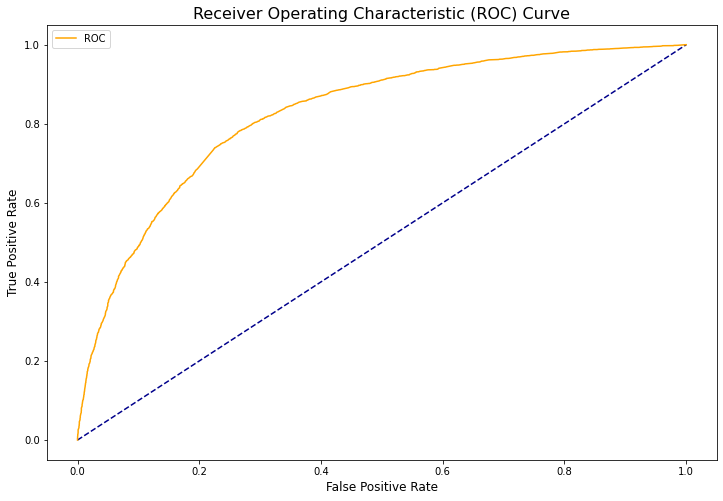

In [ ]:
# Returns as a list (false positive rate, true positive rate)
preds = lr2_tweets.select('target','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['target'])))
points = CurveMetrics(preds).get_curve('roc')

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontdict={'size':16})
plt.xlabel('False Positive Rate', fontdict={'size':12})
plt.ylabel('True Positive Rate', fontdict={'size':12})
plt.plot(x_val, y_val, color='orange', label='ROC')
plt.legend()
plt.show()


In [ ]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score

# preds = lr2_tweets.select('target','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['target']))).collect()

In [ ]:
# y_score, y_true = zip(*preds)
# fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label = 1)

In [ ]:
# # define the roc curve function
# def plot_roc_curve(fpr, tpr):
#     plt.figure(figsize=(12,8))
#     plt.plot(fpr, tpr, color='orange', label='ROC')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('False Positive Rate',fontdict={'size':12})
#     plt.ylabel('True Positive Rate', fontdict={'size':12})
#     plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
#     plt.legend()
#     plt.show()

# # Plot ROC Curve using our defined function
# plot_roc_curve(fpr, tpr)

- It shows the tradeoff between sensitivity and specificity.
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
- The slope of the tangent line at a cutpoint gives the likelihood ratio (LR) for that value of the test.
- The area under the curve is a measure of text accuracy. 

# Precision/Recall Cureve
Use the logistic regression summary object contained in the linear regression object within lr_pipe_2, create a precision recall plot. Similar to the `roc` object which is available in the logistic regression summary, there is a `pr` object which can be used to help create a precision / recall curve. The precision recall curve is built using the same high level methodology as the ROC curve, but using different metrics calculated from the confusion matrix.

Area under PR: 0.8094675590935063


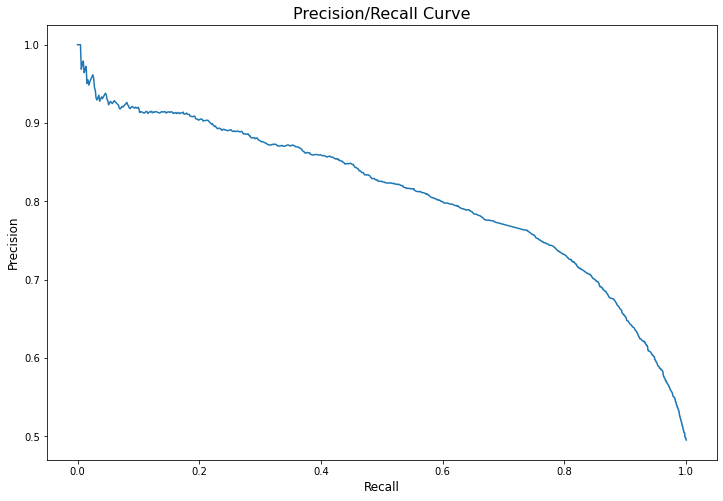

In [ ]:
points1 = CurveMetrics(preds).get_curve('pr')

plt.figure(figsize=(12,8))
x_val = [x[0] for x in points1]
y_val = [x[1] for x in points1]
plt.title('Precision/Recall Curve', fontdict={'size':16})
plt.xlabel('Recall', fontdict={'size':12})
plt.ylabel('Precision', fontdict={'size':12})
plt.plot(x_val, y_val)

print('Area under PR:',CurveMetrics(preds).areaUnderPR)



- Precision = TP / (TP + FP)
- The y-axis of the ROC curve is the same as the x-axis of the PR curve.